En este notebook se transformarán varios de los valores de las variables numéricas, ya que en su mayoría carecen de interpretabilidad

# Lectura del dataset  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../../data/ObesityDataSet.csv', sep=';')
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,Bad_Habits,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64,yes,no,2,3,Sometimes,no,2,no,0,1,1,no,Public_Transportation,Normal_Weight
1,Male,23,1.8,77,yes,no,2,3,Sometimes,no,2,no,2,1,1,Frequently,Public_Transportation,Normal_Weight
2,Male,27,1.8,87,no,no,3,3,Sometimes,no,2,no,2,0,1,Frequently,Walking,Overweight_Level_I
3,Male,22,1.78,89.8,no,no,2,1,Sometimes,no,2,no,0,0,1,Sometimes,Public_Transportation,Overweight_Level_II
4,Male,29,1.62,53,no,yes,2,3,Sometimes,no,2,no,0,0,1,Sometimes,Automobile,Normal_Weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2131,Male,30.684.347,1.915,129.966.428,yes,yes,2.108.638,3,Sometimes,yes,1.014.876,no,0.987521,0.047473,0,Sometimes,Public_Transportation,Obesity_Type_II
2132,Male,31.205.668,1.877.732,127.161.381,yes,yes,2.731.368,3,Sometimes,yes,1.486.824,no,1.485.978,1.150.439,0,Sometimes,Public_Transportation,Obesity_Type_II
2133,Male,30.899.219,1.909.639,129.013.178,yes,yes,222.259,3,Sometimes,yes,1.591.909,no,1.392.026,0.917727,0,Sometimes,Public_Transportation,Obesity_Type_II
2134,Male,31.199.261,1.848.845,125.077.863,yes,yes,249.619,3,Sometimes,yes,1.662.117,no,0.992371,0.217632,0,Sometimes,Public_Transportation,Obesity_Type_II


# Age, Height y Weight
La transformación de los valores constará de 2 pasos:
1. Obtención de los primeros 3 dígitos, para altura y peso, y 2 primeros para edad (ya que ningún individuo alcanza los 100)
2. Transformación de los valores resultantes en las unidades deseadas (edad en años, altura en centímetros, peso en kilogramos)

In [3]:
# Función para eliminar puntos y obtener los dos primeros dígitos
def transformar_valor(valor,digits):
    valor_sin_puntos = valor.replace('.', '')
    return int(valor_sin_puntos[:digits]) if valor_sin_puntos else None

In [4]:
df['Age'] = df['Age'].apply(transformar_valor, digits=2)
df['Height'] = df['Height'].apply(transformar_valor, digits=3)
df['Weight'] = df['Weight'].apply(transformar_valor, digits=3)

In [5]:
df['Height'].describe()

count    2136.000000
mean      159.364232
std        39.934482
min        15.000000
25%       162.000000
50%       169.000000
75%       176.000000
max       198.000000
Name: Height, dtype: float64

In [6]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,Bad_Habits,CALC,MTRANS,NObeyesdad
0,Female,21,162,64,yes,no,2,3,Sometimes,no,2,no,0,1,1,no,Public_Transportation,Normal_Weight
1,Male,23,18,77,yes,no,2,3,Sometimes,no,2,no,2,1,1,Frequently,Public_Transportation,Normal_Weight
2,Male,27,18,87,no,no,3,3,Sometimes,no,2,no,2,0,1,Frequently,Walking,Overweight_Level_I
3,Male,22,178,898,no,no,2,1,Sometimes,no,2,no,0,0,1,Sometimes,Public_Transportation,Overweight_Level_II
4,Male,29,162,53,no,yes,2,3,Sometimes,no,2,no,0,0,1,Sometimes,Automobile,Normal_Weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2131,Male,30,191,129,yes,yes,2.108.638,3,Sometimes,yes,1.014.876,no,0.987521,0.047473,0,Sometimes,Public_Transportation,Obesity_Type_II
2132,Male,31,187,127,yes,yes,2.731.368,3,Sometimes,yes,1.486.824,no,1.485.978,1.150.439,0,Sometimes,Public_Transportation,Obesity_Type_II
2133,Male,30,190,129,yes,yes,222.259,3,Sometimes,yes,1.591.909,no,1.392.026,0.917727,0,Sometimes,Public_Transportation,Obesity_Type_II
2134,Male,31,184,125,yes,yes,249.619,3,Sometimes,yes,1.662.117,no,0.992371,0.217632,0,Sometimes,Public_Transportation,Obesity_Type_II


Esta función pone la coma en los valores de los pesos mayores a 180 ,ya que el valor maximo del dataset es 173, por lo que los valores que sean mayores se corresponden a pesos que no todavía carecen de sentido (ej.: 673->67.3)


In [7]:
def transformar_columna(valor):
    valor_float = float(valor)

    # Verifica si el valor es mayor a 180 y lo convierte a decimal si es necesario
    if valor_float > 180:
        return valor_float / 10
    else:
        return valor_float

df['Weight'] = df['Weight'].map(transformar_columna)

In [8]:
#Transformar loas valores de alturas que están en metros a centímetros
def transformar_columna2(valor):
    valor_float = float(valor)

    # Verifica si el valor es menor a 100 y lo convierte a decimal si es necesario
    if valor_float < 100:
        return valor_float * 10
    else:
        return valor_float

df['Height'] = df['Height'].map(transformar_columna2)

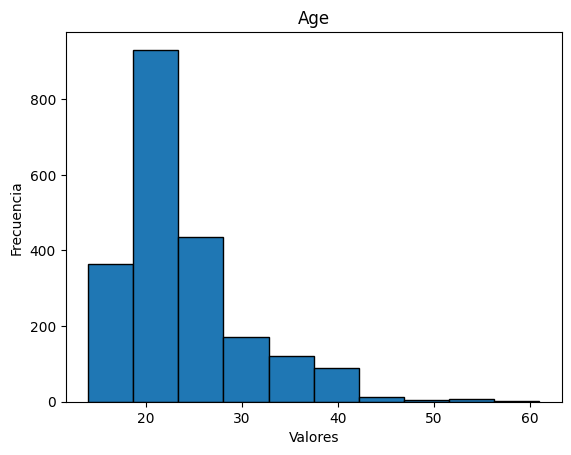

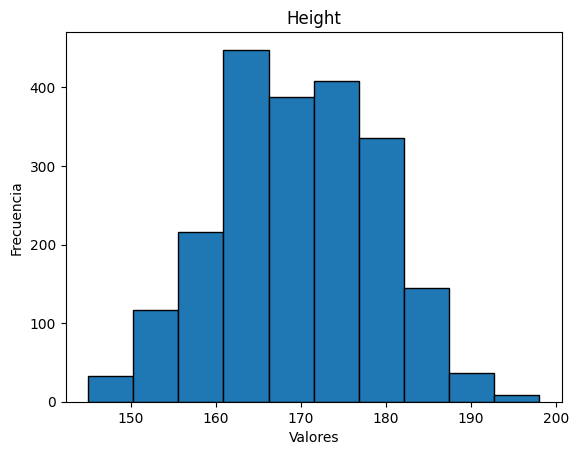

In [9]:
# Visualizar los valores en un histograma
plt.hist(df['Age'], bins=10, edgecolor='black')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Age')
plt.show()

# Visualizar los valores en un histograma
plt.hist(df['Height'], bins=10, edgecolor='black')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Height')
plt.show()

In [10]:
df['Weight'].describe()

count    2136.000000
mean       85.985534
std        26.133833
min        39.000000
25%        65.000000
50%        82.500000
75%       106.250000
max       173.000000
Name: Weight, dtype: float64

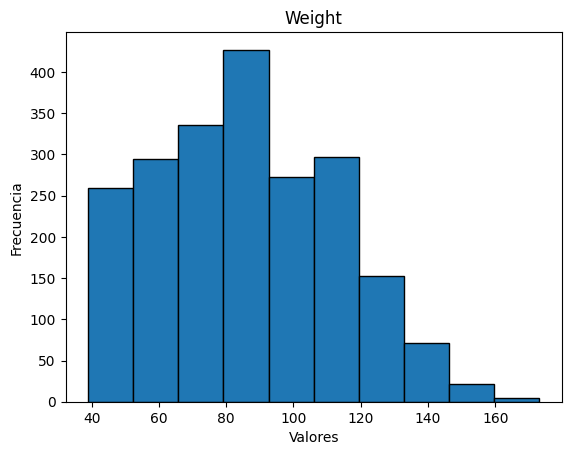

In [11]:
# Visualizar los valores en un histograma
plt.hist(df['Weight'], bins=10, edgecolor='black')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Weight')
plt.show()

In [12]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,Bad_Habits,CALC,MTRANS,NObeyesdad
0,Female,21,162.0,64.0,yes,no,2,3,Sometimes,no,2,no,0,1,1,no,Public_Transportation,Normal_Weight
1,Male,23,180.0,77.0,yes,no,2,3,Sometimes,no,2,no,2,1,1,Frequently,Public_Transportation,Normal_Weight
2,Male,27,180.0,87.0,no,no,3,3,Sometimes,no,2,no,2,0,1,Frequently,Walking,Overweight_Level_I
3,Male,22,178.0,89.8,no,no,2,1,Sometimes,no,2,no,0,0,1,Sometimes,Public_Transportation,Overweight_Level_II
4,Male,29,162.0,53.0,no,yes,2,3,Sometimes,no,2,no,0,0,1,Sometimes,Automobile,Normal_Weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2131,Male,30,191.0,129.0,yes,yes,2.108.638,3,Sometimes,yes,1.014.876,no,0.987521,0.047473,0,Sometimes,Public_Transportation,Obesity_Type_II
2132,Male,31,187.0,127.0,yes,yes,2.731.368,3,Sometimes,yes,1.486.824,no,1.485.978,1.150.439,0,Sometimes,Public_Transportation,Obesity_Type_II
2133,Male,30,190.0,129.0,yes,yes,222.259,3,Sometimes,yes,1.591.909,no,1.392.026,0.917727,0,Sometimes,Public_Transportation,Obesity_Type_II
2134,Male,31,184.0,125.0,yes,yes,249.619,3,Sometimes,yes,1.662.117,no,0.992371,0.217632,0,Sometimes,Public_Transportation,Obesity_Type_II


# FCVC (Frequency of consumption of vegetables)
Esta variable podrá tomar valores entre 1 y 3,siendo así una variable continua, la frecuencia se interpreta de la siguiente forma:"3" means "Always", "2" - "Sometimes", and "1" - "Never", 

In [13]:
df['FCVC'] = df['FCVC'].apply(transformar_valor, digits=3)

In [14]:
df['FCVC'].describe()

count    2136.000000
mean       92.988764
std       116.370908
min         1.000000
25%         2.000000
50%         3.000000
75%       218.000000
max       299.000000
Name: FCVC, dtype: float64

In [15]:
# Función para hacer decimales todos los valores a transformar (ej.: 239->2.39)
def dividir_entre_10_si_no_es_123(valor):
    if valor not in [1, 2, 3]:
        return valor / 100
    else:
        return valor



In [16]:
# Aplicar la función a la columna del DataFrame usando map
df['FCVC'] = df['FCVC'].map(dividir_entre_10_si_no_es_123)

In [17]:
print(df['FCVC'].describe())

count    2136.000000
mean        2.418132
std         0.534713
min         1.000000
25%         2.000000
50%         2.390000
75%         3.000000
max         3.000000
Name: FCVC, dtype: float64


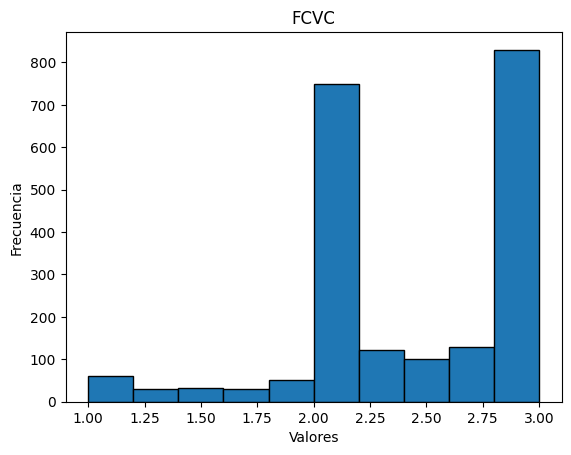

In [18]:
# Visualizar los valores en un histograma
plt.hist(df['FCVC'], bins=10, edgecolor='black')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('FCVC')
plt.show()

# NCP(Number of main meals)
 Número de comidas principales al día: "Between 1 and 2", "Three", and "More than three". Instead of categorical, this feature also holds numerical values. Esta variable también la trartaremos como una continua, ya que es posible que los decimales puedan aportar información acerca de otras comidas que los individuos no consideran principales ("picoteo")

In [19]:
df['NCP'] = df['NCP'].apply(transformar_valor, digits=3)

In [20]:
df['NCP'].describe()

count    2136.000000
mean       77.777154
std       122.327816
min         1.000000
25%         3.000000
50%         3.000000
75%       148.250000
max       399.000000
Name: NCP, dtype: float64

In [21]:
# Función para hacer decimales todos los valores a transformar (ej.: 239->2.39)
def dividir_entre_10_si_no_es_1234(valor):
    if valor not in [1, 2, 3, 4]:
        return valor / 100
    else:
        return valor

In [22]:
# Aplicar la función a la columna del DataFrame usando map
df['NCP'] = df['NCP'].map(dividir_entre_10_si_no_es_1234)

In [23]:
print(df['NCP'].describe())

count    2136.000000
mean        2.690566
std         0.779694
min         1.000000
25%         2.667500
50%         3.000000
75%         3.000000
max         4.000000
Name: NCP, dtype: float64


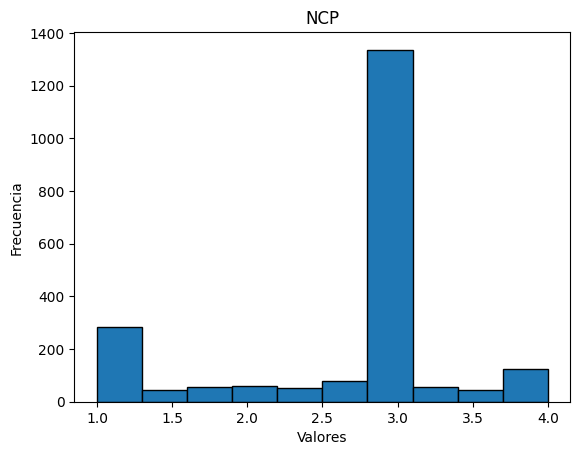

In [24]:
# Visualizar los valores en un histograma
plt.hist(df['NCP'], bins=10, edgecolor='black')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('NCP')
plt.show()

# CH20(Consumption of water daily)
Hábitos de consumo de agua: "Less than a litter", "Between 1 and 2 L", and "More than 2 L". Instead, the answeres are entered as continuous values. Pesé a que la mayoría de los valores se acumulen en 1,2 y 3, trataremos esta variable como un continuo ya que en los valores intermedios podría haber información relevante con respecto a dicho hábito.


In [25]:
df['CH2O'] = df['CH2O'].apply(transformar_valor, digits=3)

In [26]:
df['CH2O'].describe()

count    2136.000000
mean      125.822097
std       108.250474
min         1.000000
25%         2.000000
50%       140.000000
75%       220.000000
max       299.000000
Name: CH2O, dtype: float64

In [27]:
# Aplicar la función a la columna del DataFrame usando map
df['CH2O'] = df['CH2O'].map(dividir_entre_10_si_no_es_123)

In [28]:
df['CH2O'].describe()

count    2136.000000
mean        2.002575
std         0.612520
min         1.000000
25%         1.567500
50%         2.000000
75%         2.470000
max         3.000000
Name: CH2O, dtype: float64

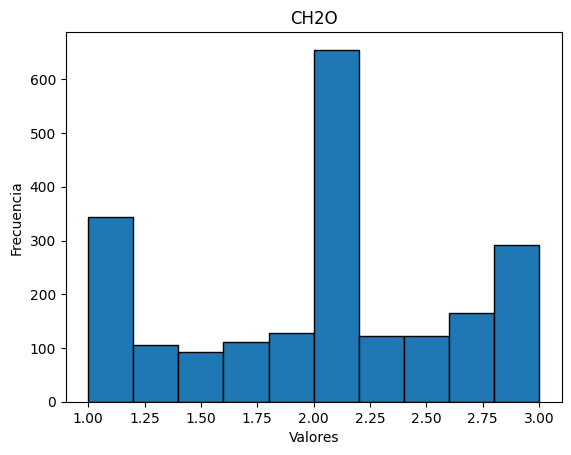

In [29]:
# Visualizar los valores en un histograma
plt.hist(df['CH2O'], bins=10, edgecolor='black')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('CH2O')
plt.show()

# FAF(Physical activity frequency)
Actividad física, tenían que escoger 1 de 4 respuestas posibles: "I do not have", "1 or 2 days", "2 or 4 days", and "4 or 5 days". Al igual que en las anteriores variables, trataremos FAF como un continua para no descartar potencial información relevante

In [30]:
df['FAF'] = df['FAF'].apply(transformar_valor, digits=3)

In [31]:
df['FAF'].describe()

count    2136.000000
mean       62.373127
std        76.275495
min         0.000000
25%         1.000000
50%        17.000000
75%       115.250000
max       299.000000
Name: FAF, dtype: float64

In [32]:
# Función para hacer decimales todos los valores a transformar (ej.: 239->2.39)
def dividir_entre_10_si_no_es_0123(valor):
    if valor not in [0, 1, 2, 3]:
        return valor / 100
    else:
        return valor

In [33]:
# Aplicar la función a la columna del DataFrame usando map
df['FAF'] = df['FAF'].map(dividir_entre_10_si_no_es_0123)

In [34]:
df['FAF'].describe()

count    2136.000000
mean        1.045037
std         0.855676
min         0.000000
25%         0.170000
50%         1.000000
75%         1.730000
max         3.000000
Name: FAF, dtype: float64

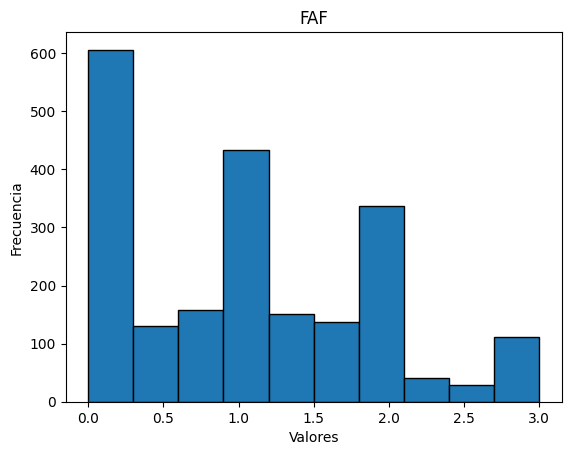

In [35]:
# Visualizar los valores en un histograma
plt.hist(df['FAF'], bins=10, edgecolor='black')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('FAF')
plt.show()

# TUE(Time using technology devices)
Tiempo de uso de aparatos tecnológicos como teléfonos móviles, videojuegos, television, ordenador, etc. Tenían que escoger entre "0-2 hours"=0, "3-5 hours"=1, and "More than 5 hours"=2. Los valores los transformaremos como continuos y no como categorías por la misma razón que en los casos anteriores.

In [36]:
df['TUE'] = df['TUE'].apply(transformar_valor, digits=3)

In [37]:
df['TUE'].describe()

count    2136.000000
mean       41.644663
std        53.138912
min         0.000000
25%         0.000000
50%        10.000000
75%        76.000000
max       199.000000
Name: TUE, dtype: float64

In [38]:
# Función para hacer decimales todos los valores a transformar (ej.: 239->2.39)
def dividir_entre_10_si_no_es_012(valor):
    if valor not in [0, 1, 2]:
        return valor / 100
    else:
        return valor

In [39]:
# Aplicar la función a la columna del DataFrame usando map
df['TUE'] = df['TUE'].map(dividir_entre_10_si_no_es_012)

In [40]:
df['TUE'].describe()

count    2136.000000
mean        0.669972
std         0.611928
min         0.000000
25%         0.000000
50%         0.640000
75%         1.000000
max         2.000000
Name: TUE, dtype: float64

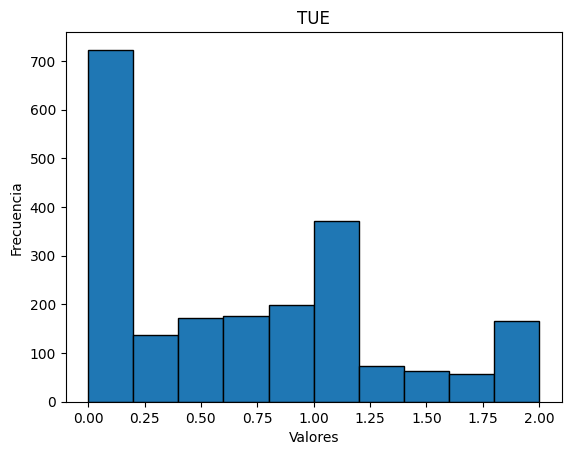

In [41]:
# Visualizar los valores en un histograma
plt.hist(df['TUE'], bins=10, edgecolor='black')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('TUE')
plt.show()

In [42]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,Bad_Habits,CALC,MTRANS,NObeyesdad
0,Female,21,162.0,64.0,yes,no,2.00,3.0,Sometimes,no,2.00,no,0.00,1.00,1,no,Public_Transportation,Normal_Weight
1,Male,23,180.0,77.0,yes,no,2.00,3.0,Sometimes,no,2.00,no,2.00,1.00,1,Frequently,Public_Transportation,Normal_Weight
2,Male,27,180.0,87.0,no,no,3.00,3.0,Sometimes,no,2.00,no,2.00,0.00,1,Frequently,Walking,Overweight_Level_I
3,Male,22,178.0,89.8,no,no,2.00,1.0,Sometimes,no,2.00,no,0.00,0.00,1,Sometimes,Public_Transportation,Overweight_Level_II
4,Male,29,162.0,53.0,no,yes,2.00,3.0,Sometimes,no,2.00,no,0.00,0.00,1,Sometimes,Automobile,Normal_Weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2131,Male,30,191.0,129.0,yes,yes,2.10,3.0,Sometimes,yes,1.01,no,0.98,0.04,0,Sometimes,Public_Transportation,Obesity_Type_II
2132,Male,31,187.0,127.0,yes,yes,2.73,3.0,Sometimes,yes,1.48,no,1.48,1.15,0,Sometimes,Public_Transportation,Obesity_Type_II
2133,Male,30,190.0,129.0,yes,yes,2.22,3.0,Sometimes,yes,1.59,no,1.39,0.91,0,Sometimes,Public_Transportation,Obesity_Type_II
2134,Male,31,184.0,125.0,yes,yes,2.49,3.0,Sometimes,yes,1.66,no,0.99,0.21,0,Sometimes,Public_Transportation,Obesity_Type_II


In [43]:
df.to_csv('../../data/obesity_transform.csv', index = False)